In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df1_test = pd.read_csv('fraudTest.csv', encoding='latin-1')
df1_train = pd.read_csv('fraudTrain.csv', encoding='latin-1')

In [3]:
df1_test.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [4]:
df1_test.tail(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555709,555709,2020-12-31 23:57:18,30344654314976,"fraud_Larkin, Stracke and Greenfelder",entertainment,46.71,Christine,Johnson,F,8011 Chapman Tunnel Apt. 568,...,39.8127,-120.6405,1725,Chartered legal executive (England and Wales),1967-05-27,a7105564935ea3977dc61ff9ced3bf5e,1388534238,38.963543,-120.457121,0
555710,555710,2020-12-31 23:57:50,3524574586339330,"fraud_Heathcote, Yost and Kertzmann",shopping_net,29.56,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,9fc9f6f9be3182d519a61a119cf97199,1388534270,27.593881,-80.855092,0
555711,555711,2020-12-31 23:57:56,341546199006537,fraud_Schmidt-Larkin,home,12.68,Mark,Brown,M,8580 Moore Cove,...,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,1388534276,65.623593,-165.186033,0
555712,555712,2020-12-31 23:58:04,501802953619,"fraud_Pouros, Walker and Spencer",kids_pets,13.02,Robert,Flores,M,3277 Fields Meadows Apt. 790,...,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,1388534284,41.973127,-123.553032,0
555713,555713,2020-12-31 23:58:34,3523843138706408,"fraud_Prosacco, Kreiger and Kovacek",home,17.00,Grace,Williams,F,28812 Charles Mill Apt. 628,...,32.6176,-86.9475,1412,Drilling engineer,1970-11-20,6d04313bfe4b661b8ca2b6a499a320fe,1388534314,32.164145,-87.539669,0
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [5]:
df1_train.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [6]:
df1_train.tail(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296665,1296665,2020-06-21 12:08:42,213193596103206,fraud_Gulgowski LLC,home,72.17,James,Hunt,M,7369 Gabriel Tunnel,...,45.7549,-84.4470,95,Electrical engineer,1994-02-09,108c103b26f686c24c021aaf4210977e,1371816522,44.938461,-83.996234,0
1296666,1296666,2020-06-21 12:09:22,4587657402165341815,"fraud_Hyatt, Russel and Gleichner",health_fitness,7.30,Amber,Lewis,F,6296 John Keys Suite 858,...,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,37a18c6fb0c5c722b6339ffedc82f55a,1371816562,40.556811,-88.092339,0
1296667,1296667,2020-06-21 12:10:56,4822367783500458,"fraud_Hahn, Douglas and Schowalter",travel,19.71,Christopher,Farrell,M,97070 Anderson Land,...,28.0758,-81.5929,33804,Exercise physiologist,1991-01-01,34e72e0a659a6c8f4a20ee65594f3a7d,1371816656,27.465871,-81.511804,0
1296668,1296668,2020-06-21 12:11:23,213141712584544,"fraud_Metz, Russel and Metz",kids_pets,100.85,Margaret,Curtis,F,742 Oneill Shore,...,32.1530,-90.1217,19685,Fine artist,1984-12-24,0d86d8c17638d7eff77db9c6a878b477,1371816683,31.377697,-90.528450,0
1296669,1296669,2020-06-21 12:11:36,4400011257587661852,fraud_Stiedemann Inc,misc_pos,37.38,Marissa,Powell,F,474 Allen Haven,...,41.4972,-98.7858,509,"Nurse, children's",1980-09-15,9a7ea2625cf8303efe34e3c09546868f,1371816696,41.728638,-99.039660,0
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [7]:
df1_train.shape

(1296675, 23)

In [8]:
df1_test.shape

(555719, 23)

In [9]:
df1_test.size

12781537

In [10]:
df1_train.size

29823525

In [11]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [12]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [13]:
df1_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [14]:
df1_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [15]:
df1_test.isnull().values.any()

False

In [16]:
df1_train.isnull().values.any()

False

In [17]:
df1_test.count()

Unnamed: 0               555719
trans_date_trans_time    555719
cc_num                   555719
merchant                 555719
category                 555719
amt                      555719
first                    555719
last                     555719
gender                   555719
street                   555719
city                     555719
state                    555719
zip                      555719
lat                      555719
long                     555719
city_pop                 555719
job                      555719
dob                      555719
trans_num                555719
unix_time                555719
merch_lat                555719
merch_long               555719
is_fraud                 555719
dtype: int64

In [18]:
df1_train.count()

Unnamed: 0               1296675
trans_date_trans_time    1296675
cc_num                   1296675
merchant                 1296675
category                 1296675
amt                      1296675
first                    1296675
last                     1296675
gender                   1296675
street                   1296675
city                     1296675
state                    1296675
zip                      1296675
lat                      1296675
long                     1296675
city_pop                 1296675
job                      1296675
dob                      1296675
trans_num                1296675
unix_time                1296675
merch_lat                1296675
merch_long               1296675
is_fraud                 1296675
dtype: int64

In [19]:
df1_combined = pd.concat([df1_train, df1_test], axis=0)

In [20]:
df1_combined.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [21]:
df1_combined.tail(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555709,555709,2020-12-31 23:57:18,30344654314976,"fraud_Larkin, Stracke and Greenfelder",entertainment,46.71,Christine,Johnson,F,8011 Chapman Tunnel Apt. 568,...,39.8127,-120.6405,1725,Chartered legal executive (England and Wales),1967-05-27,a7105564935ea3977dc61ff9ced3bf5e,1388534238,38.963543,-120.457121,0
555710,555710,2020-12-31 23:57:50,3524574586339330,"fraud_Heathcote, Yost and Kertzmann",shopping_net,29.56,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,9fc9f6f9be3182d519a61a119cf97199,1388534270,27.593881,-80.855092,0
555711,555711,2020-12-31 23:57:56,341546199006537,fraud_Schmidt-Larkin,home,12.68,Mark,Brown,M,8580 Moore Cove,...,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,1388534276,65.623593,-165.186033,0
555712,555712,2020-12-31 23:58:04,501802953619,"fraud_Pouros, Walker and Spencer",kids_pets,13.02,Robert,Flores,M,3277 Fields Meadows Apt. 790,...,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,1388534284,41.973127,-123.553032,0
555713,555713,2020-12-31 23:58:34,3523843138706408,"fraud_Prosacco, Kreiger and Kovacek",home,17.00,Grace,Williams,F,28812 Charles Mill Apt. 628,...,32.6176,-86.9475,1412,Drilling engineer,1970-11-20,6d04313bfe4b661b8ca2b6a499a320fe,1388534314,32.164145,-87.539669,0
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [22]:
df1_combined.shape

(1852394, 23)

In [23]:
df1_combined.size

42605062

In [24]:
df1_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [25]:
df1_combined.drop(labels = ["first", "last", "job", "dob", "trans_num", "street", "trans_date_trans_time", "city", "state"], axis=1, inplace=True)

In [26]:
df1_combined.head(10)

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
5,5,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,F,18917,40.3750,-75.2045,2158,1325376248,40.653382,-76.152667,0
6,6,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,F,67851,37.9931,-100.9893,2691,1325376282,37.162705,-100.153370,0
7,7,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,M,22824,38.8432,-78.6003,6018,1325376308,38.948089,-78.540296,0
8,8,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,F,15665,40.3359,-79.6607,1472,1325376318,40.351813,-79.958146,0
9,9,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,F,37040,36.5220,-87.3490,151785,1325376361,37.179198,-87.485381,0


In [27]:
df1_combined.tail(10)

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
555709,555709,30344654314976,"fraud_Larkin, Stracke and Greenfelder",entertainment,46.71,F,96103,39.8127,-120.6405,1725,1388534238,38.963543,-120.457121,0
555710,555710,3524574586339330,"fraud_Heathcote, Yost and Kertzmann",shopping_net,29.56,F,32960,27.6330,-80.4031,105638,1388534270,27.593881,-80.855092,0
555711,555711,341546199006537,fraud_Schmidt-Larkin,home,12.68,M,99783,64.7556,-165.6723,145,1388534276,65.623593,-165.186033,0
555712,555712,501802953619,"fraud_Pouros, Walker and Spencer",kids_pets,13.02,M,96037,41.5403,-122.9366,308,1388534284,41.973127,-123.553032,0
555713,555713,3523843138706408,"fraud_Prosacco, Kreiger and Kovacek",home,17.00,F,36758,32.6176,-86.9475,1412,1388534314,32.164145,-87.539669,0
555714,555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
555715,555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
555716,555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
555717,555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0
555718,555718,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,M,73034,35.6665,-97.4798,116001,1388534374,36.210097,-97.036372,0


# DATA VISUALIZATION

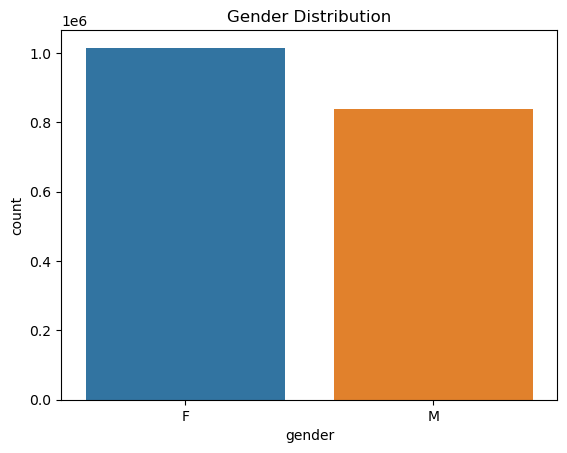

In [28]:
sns.countplot(x='gender', data = df1_combined)
plt.title("Gender Distribution")
plt.show()

# DATA PREPROCESSING

In [30]:
encoder = LabelEncoder()
new_column = encoder.fit_transform(df1_combined["merchant"].values)
df1_combined["merchant_new"] = new_column
df1_combined.drop(labels=["merchant"], axis=1, inplace=True)

In [31]:
encoder = LabelEncoder()
new_column1 = encoder.fit_transform(df1_combined["category"].values)
df1_combined["category_new"] = new_column1
df1_combined.drop(labels=["category"], axis=1, inplace=True)

In [32]:
df1_combined = pd.get_dummies(df1_combined)
df1_combined.drop(labels=['gender_M'], axis=1, inplace=True)

In [33]:
df1_combined.head(10)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merchant_new,category_new,gender_F
0,0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,514,8,True
1,1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,241,4,True
2,2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,390,0,False
3,3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,360,2,False
4,4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,297,9,False
5,5,4767265376804500,94.63,18917,40.3750,-75.2045,2158,1325376248,40.653382,-76.152667,0,607,2,True
6,6,30074693890476,44.54,67851,37.9931,-100.9893,2691,1325376282,37.162705,-100.153370,0,534,3,True
7,7,6011360759745864,71.65,22824,38.8432,-78.6003,6018,1325376308,38.948089,-78.540296,0,107,2,False
8,8,4922710831011201,4.27,15665,40.3359,-79.6607,1472,1325376318,40.351813,-79.958146,0,250,9,True
9,9,2720830304681674,198.39,37040,36.5220,-87.3490,151785,1325376361,37.179198,-87.485381,0,563,4,True


In [34]:
df1_combined.tail(10)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merchant_new,category_new,gender_F
555709,555709,30344654314976,46.71,96103,39.8127,-120.6405,1725,1388534238,38.963543,-120.457121,0,374,0,True
555710,555710,3524574586339330,29.56,32960,27.6330,-80.4031,105638,1388534270,27.593881,-80.855092,0,238,11,True
555711,555711,341546199006537,12.68,99783,64.7556,-165.6723,145,1388534276,65.623593,-165.186033,0,558,6,False
555712,555712,501802953619,13.02,96037,41.5403,-122.9366,308,1388534284,41.973127,-123.553032,0,482,7,False
555713,555713,3523843138706408,17.00,36758,32.6176,-86.9475,1412,1388534314,32.164145,-87.539669,0,490,6,True
555714,555714,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0,507,5,False
555715,555715,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0,264,7,False
555716,555716,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0,496,7,True
555717,555717,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0,75,13,False
555718,555718,4170689372027579,38.13,73034,35.6665,-97.4798,116001,1388534374,36.210097,-97.036372,0,125,0,False


In [35]:
# Splitting the data
x = df1_combined.drop("is_fraud", axis=1)
y = df1_combined["is_fraud"]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=40)

# LOGISTIC REGRESSION MODEL

In [37]:
log_reg_model = LogisticRegression()

In [38]:
log_reg_model.fit(x_train, y_train)

C:\Users\91844\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
log_reg_pred = log_reg_model.predict(x_test)

In [40]:
print("Logistic Regression Model")
print(confusion_matrix(y_test, log_reg_pred))
print(classification_report(y_test, log_reg_pred))
print("Accuracy - ", accuracy_score(y_test, log_reg_pred))
print("r2_Score - ", r2_score(y_test, log_reg_pred))
print("Precision_Score - ", precision_score(y_test, log_reg_pred))
print("Recall Score - ", recall_score(y_test, log_reg_pred))
print("f1_score - ", f1_score(y_test, log_reg_pred))

Logistic Regression Model
[[552842      0]
 [  2877      0]]


C:\Users\91844\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91844\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91844\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    552842
           1       0.00      0.00      0.00      2877

    accuracy                           0.99    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      0.99      0.99    555719

Accuracy -  0.9948229230960252
r2_Score -  -0.005204018508000896


C:\Users\91844\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision_Score -  0.0
Recall Score -  0.0
f1_score -  0.0


# DECISION TREE MODEL

In [41]:
dec_tree_model = DecisionTreeClassifier()

In [42]:
dec_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
dec_tree_pred = dec_tree_model.predict(x_test)

In [44]:
print("Decision Tree Model")
print(confusion_matrix(y_test, dec_tree_pred))
print(classification_report(y_test, dec_tree_pred))
print("Accuracy - ", accuracy_score(y_test, dec_tree_pred))
print("r2_Score - ", r2_score(y_test, dec_tree_pred))
print("Precision_Score - ", precision_score(y_test, dec_tree_pred))
print("Recall Score - ", recall_score(y_test, dec_tree_pred))
print("f1_score - ", f1_score(y_test, dec_tree_pred))

Decision Tree Model
[[551684   1158]
 [  1063   1814]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552842
           1       0.61      0.63      0.62      2877

    accuracy                           1.00    555719
   macro avg       0.80      0.81      0.81    555719
weighted avg       1.00      1.00      1.00    555719

Accuracy -  0.9960033758068376
r2_Score -  0.22399787100929103
Precision_Score -  0.6103633916554508
Recall Score -  0.6305179005908933
f1_score -  0.6202769704222943


# RANDOM FOREST MODEL

In [45]:
ran_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=40)

In [46]:
ran_model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=40)

In [47]:
ran_pred = ran_model.predict(x_test)

In [48]:
print("Random Forest Model")
print(confusion_matrix(y_test, ran_pred))
print(classification_report(y_test, ran_pred))
print("Accuracy - ", accuracy_score(y_test, ran_pred))
print("r2_Score - ", r2_score(y_test, ran_pred))
print("Precision_Score - ", precision_score(y_test, ran_pred))
print("Recall Score - ", recall_score(y_test, ran_pred))
print("f1_score - ", f1_score(y_test, ran_pred))

Random Forest Model
[[552595    247]
 [  1030   1847]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552842
           1       0.88      0.64      0.74      2877

    accuracy                           1.00    555719
   macro avg       0.94      0.82      0.87    555719
weighted avg       1.00      1.00      1.00    555719

Accuracy -  0.9977020760492263
r2_Score -  0.5538249803146622
Precision_Score -  0.8820439350525311
Recall Score -  0.6419881821341675
f1_score -  0.7431100382216859


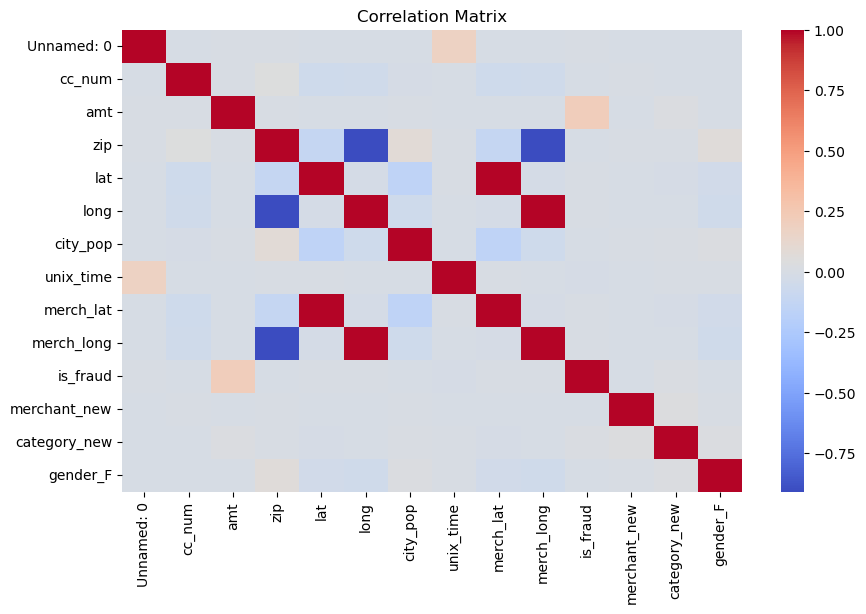

In [49]:
correlation_matrix=df1_combined.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()